# CUWALID TRAINING

## DRYP: Creating a catchment scale model

This section (in bold) is part of the CUWALID training material:

1. Preparing model input parameters and dataset
2. Running a catchment scale DRYP model
3. ***Post-processing DRYP model outputs***

### 3. Post-processing datasets

1. Understanding model outputs
2. Post-processing model outputs
3. Sampling model outputs

In [2]:
# Import libraries from a local repository
import os
import sys
#sys.path.append("C:/Users/Edisson/Documents/GitHub/CUWALID") # DELETE THIS LINE AS THE PACKAGE CONTAINS ALL

import cuwalid.dryp.components.DRYP_watershed as ppbasin # component for basin delineation
import cuwalid.tools.DRYP_plot_tools as plotcwld # component to read model input files
import cuwalid.tools.DRYP_pptools as pptools # Component for postprocessing model output files
import cuwalid.tools.DRYP_rrtools as rrtools # Component for preprocessing raster datasets

In [3]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapefile as shp
import xarray as xr
import rasterio

**NOTE**: Before you start, please change the path to access the following directories:

In [38]:
training_general_path = "D:/HAD/training/"
regional_path = "D:/HAD/training/regional/"
basin_path = "D:/HAD/training/basin/"


In [39]:
global_path = ""
global_path = "D:/HAD/training/historical/basin/"

Specify the location of the model input parameter files, remember that this is the JSON file. We are going to use this input file to get all model parameter paths as well as output paths.

In [40]:
# get path of model parameter setting file
path_input = os.path.join(global_path, "model/AW_input.json")

Read the list of model input parameter files directly from the JSON file. You can use the the following function to read the JSON file, however, note that you can write all paths directly in the funtion.

In [41]:
# function to read a model parameter setting file as a dictionary
path_paramters = plotcwld.read_json_file(path_input)

In [42]:
# function to get path of model outputs
path_outputs = pptools.get_output_filenames(path_input)

#### 4.1. Understanding model outputs

Model results are stored in two different formats:

* Comma delimited files (*.csv*) to store time series, and
* netCDF files (*.nc*) to store gridded output datasets
* ascii raster files (*.asc*) to store hydrological states for initial condions

Model outputs stored in csv files store model results at specified locations as well as average model results.
Point location result files have a letter "p" followed by name of the stored variable (e.g. tht) added at the end
of the name of the file. Basin average results have the letters "avg" added at the end of the file name.

In [48]:
####File does not exist
fsim = [
#basin_path + "output/Tana_IMb_sim_p_dis_avg.csv",
]


**TASK**: Take a look at the content of the file specified above. HINT: use pandas to open and explore the dataset

In [49]:
fields = ['pre_0', 'rch_0', 'aet_0', 'gdh_0', 'egw_0', 'twsc_0', 'run_0']

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:126: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df.resample(delta_t).mean().reset_index()
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:129: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df.resample(delta_t).mean(numeric_only=True).reset_index()
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:130: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).sum(numeric_only=True).reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: ylabel='precipitation\n[mm/dt]'>,
       <Axes: ylabel='total\ngroundwater\nrecharge\n[mm/dt]'>,
       <Axes: ylabel='actual\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='groundwater\ndischarge\n[m3/dt]'>,
       <Axes: ylabel='groundwater\nevaporation\n[mm/dt]'>,
       <Axes: ylabel='water\nstorage\nchange\n[mm]'>,
       <Axes: xlabel='Date', ylabel='runoff\n[mm/dt]'>], dtype=object)

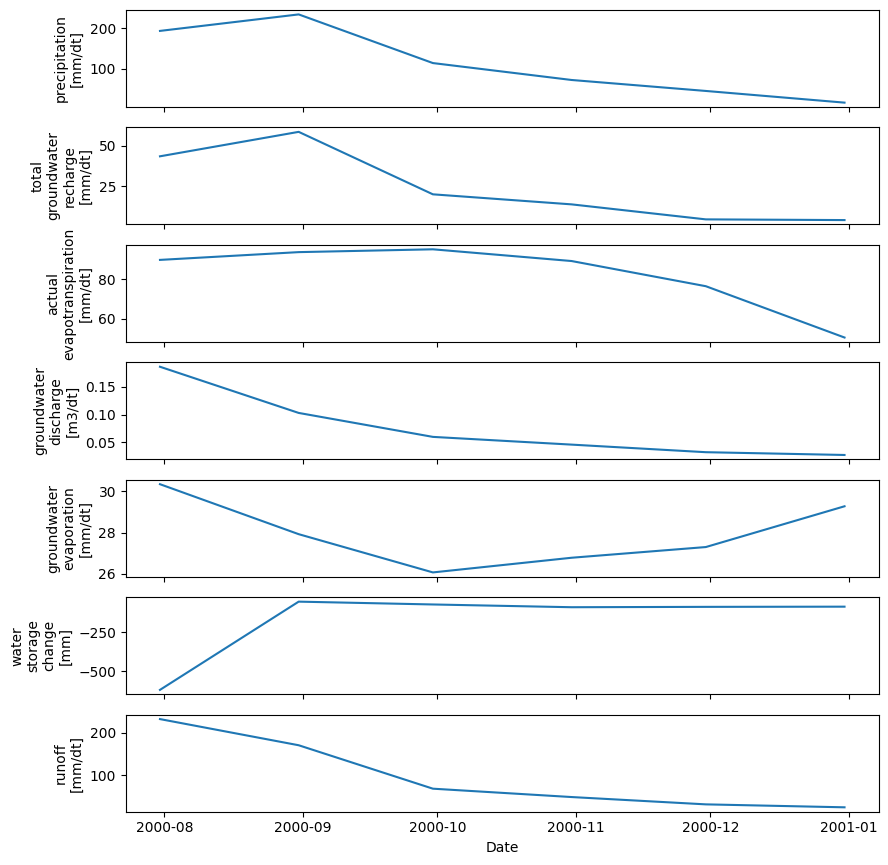

In [50]:
# Call function to plot average values of model outputs, it is *CSV file with "avg" at the end of the name
plotcwld.plot_avg_var(os.path.join(global_path, path_outputs.path_csv["avg"]),
                      fields=fields, delta_t="1M"
                     )

In [51]:
def aggregate_slice_csv(fname, agg_step='M', mean=True,
                        date_start='2000-01-01', date_end='2023-01-01',
                        timefield='Date'):
	df = pd.read_csv(fname)
	df[timefield] = pd.to_datetime(df[timefield])
	df = df[df[timefield].between(date_start, date_end)]
	df.index = pd.DatetimeIndex(df[timefield])
	if mean is True:
		df = df.resample(agg_step).mean().reset_index()
	else:
		df = df.resample(agg_step).sum().reset_index()
	return df

In [ ]:
# plot data
fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(9, 4.5)
label = ['pre', 'tht', "aet"]#, "twsc"]
field = ['pre_0','tht_0', "aet_0"]#, "twsc_0"]
#ilabel = "sim"
for ifname in fsim:
    for ifield, ilabel, iax in zip(field, label, fig.axes):
        data = aggregate_slice_csv(ifname, timefield='Date')
        #ax.plot(data['date'], data['flow(m3/s)'], label=ilabel)#data.plot(y='Flow (Cumecs)')        
        if ifield == "twsc_0":
            iax.plot(data['Date'], np.cumsum(data[ifield]))#, label=ilabel)
        elif ifield == "tht_0":
            iax.plot(data['Date'], data[ifield])#, scale=True)
        else:
            iax.plot(data['Date'], data[ifield])#, label=ilabel)
        
        iax.set_ylabel(ilabel)
iax.legend(["Sim"], frameon=False)

Reading output stored at specific locations

In [53]:
fnamesim=[
#basin_path + "output/Juba_IMa_sim_p_dis.csv",
]
#/Users/isamarcortes/Downloads/training/basin/output/Juba_IMa_sim_p_dis.csv

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(9, 3)

for ifnamesim in fnamesim:
    data = aggregate_slice_csv(ifnamesim)
    stn = ['dis_5', "dis_3"]
    for istn, iax in zip(stn, fig.axes):
        iax.plot(data['Date'], data[istn]/30.5/86400, label='Sim')
        iax.set_ylabel("Flow (m3/s)")

In [55]:
# uncomment this line and save it in a local directory
#fname_out = 'd:/HAD_basins/basin_postpp/fig/Juba_streamflow.png'
#fig.savefig(fname_out, dpi=300)

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:213: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).mean().reset_index()
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:215: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).mean(numeric_only=True).reset_index()


<Axes: xlabel='Date', ylabel='water\ntable\nelevation\n[m]'>

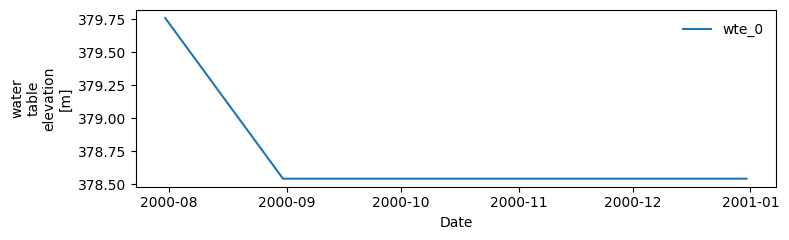

In [56]:
# call the function to plot point values at locations specified in the model parameter file
plotcwld.plot_point_var(os.path.join(global_path, path_outputs.path_csv["point"]["wte"]),
                        fields=["wte_0"],
                        delta_t="1M")

**TASK**: plot groundwater recharge and total water storage at specific locations and basin average results.

Gridded datasets are stored by DRYP in netCDF and raster files. NetCFD files store temporal grided datasets whereas raster datasets store the last step of the simulation.

The following variables are stored as netCDF files:

* Precipitaion (pre)
* Potential evapotranspiration (pet)
* Actual evapotranspiration (aet)
* soil water content (tht)
* Total groundwater recharge (rch)
* Focused groundwater recharge (fch)
* Water table elevation (wte)
* Groundwater discharge (gdh)
* Groundwater Evapotranspiration (egw)
* Streamflow (dis)
* Infiltration (inf)
* Runoff (run)
* Total water storage (twsc)
* soil water content riparian zone (tht)


NetCDF files are easily handled with xarray, although netCDF4 or geopands can also be used to deal with this files.

In [ ]:
#/Users/isamarcortes/Downloads/training/basin/output/Tana_IMb_sim_grid.nc
fname_nc = basin_path + "output/Tana_IMb_sim_grid.nc"

In [ ]:
#xr.open_dataset(fname_nc)

In [ ]:
def read_dataset(fname, var_name='tht'):
	# Open the first netCDF file
	data = xr.open_dataset(fname)
	data = data[var_name]
	return data

def slice_dataset_time(dataset, start_time="2003-01-01", end_time="2012-01-01"):
	# Slice the dataset between two dates
	dataset = dataset.sel(time=slice(start_time, end_time))
	return dataset

In [ ]:
#read_dataset(fname_nc, var_name='tht')

DRYP stores as raster files, at the end of the simulation, the following variables:

* water table elevation
* soil and riparian water content
* surface water storage


Raster files can easily be handled with rasterio.

In [ ]:
def plot_raster_file(fname, ax=None, vmin=-20.0, vmax=20.0):
    # create plot
    if ax is None:
        fig, ax = plt.subplots()
    cmap = plt.cm.get_cmap('coolwarm_r', 12)
    data = rasterio.open(fname).read(1)
    im = ax.imshow(data,# origin="lower",#cmap=cmap, 
                   #vmin=vmin, vmax=vmax,
                   )#extent=bounds)	
    
    ax.axis('off')
    plt.colorbar(im)
    return im

In [ ]:

fname_raster = basin_path + "output/Tana_IMb_sim_avg_wte_ini.asc"

In [ ]:
plot_raster_file(fname_raster, ax=None, vmin=-20.0, vmax=20.0)

#### 4.2. Post-processing model outputs

A post-processing component (DRYP_pptools) has been added to DRYP to perform basic operation with model outputs. This tool is still under
development therefore capabilities are limited.

Bellow some of the operations that can be performed with DRYP_pptools are listed, some examples are also shown below: 

1. Calulate long term average
2. Calculate soil saturation
3. calculate WRSI
4. Calculate anomalies
5. Calculate total water storage anomalies (TWSA)
6. Calculate seasonal average
7. calculate seasonal anomalies
8. Sampling model outputs

Initiallize DRYP post processing tool library

Initialize the grid postprocessing tool, this step will create a python object with all model output filenames. This function uses the model parameter input file to get model output and paths:

In [ ]:
file_model_input = basin_path + "model/HAD_IMERG_Tana_input_sim.dmp"

In [ ]:
#gridpp = pptools.grid_pptools(file_model_input)

When runing the function bellow, the long term average, WRSI, and TWSA will be estimated. These functions will directly use model paths and output files specified in the input model file

In [ ]:
#gridpp.get_mean() # save mean values
#gridpp.get_wrsi() # save wsri
#gridpp.get_twsa() # save total water storage anomaly

We can also use DRYP_pptools without initalising the gridded component. We can directly call all the functions used by the post processing tools. This function is useful when model outputs are located in other folders.

A detailed description of each function can be found in DRYP documentation, which is located in DRYP/doc/build/html (you can use your browser to open html files). 

1. Calculate the long term average of model fluxes

In [24]:
# get the path of the gridded output dataset
fname_nc = os.path.join(global_path, path_outputs.path_grid["grid"])

In [25]:
fields = ['pre', 'inf', 'pet', 'rch', 'aet', 'gdh', 'egw', 'fch', 'twsc', 'run']

In [26]:
pptools.calculate_mean_from_netCDF(fname_nc, field=fields)#, fname_out=None, deltat='Y', start_time='2000-20-1', end_time=None)

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, pleas

2. Calculate saturation

In [27]:
# get the path of the wilting point
path_wp = os.path.join(global_path, path_paramters["path_input"], path_paramters["UNSATURATED"]["path_uz_theta_wp"])

# get the path of the wilting point
path_sat = os.path.join(global_path, path_paramters["path_input"], path_paramters["UNSATURATED"]["path_uz_theta_sat"])

In [28]:
# Call function to calculate saturation from netCDF file
#fname_nc = os.path.join(global_path, path_outputs.path_grid["grid"])
pptools.calculate_saturation_from_netCDF(fname_nc, path_wp, path_sat, fname_out=None,
									 var_name="tht",)

2. Calculate storage change in all model components

In [29]:
# get the path of the surface elevation
path_dem = os.path.join(global_path, path_paramters["path_input"], path_paramters["TERRAIN"]["path_dem"])

# get the path of root depth
path_Droot = os.path.join(global_path, path_paramters["path_input"], path_paramters["UNSATURATED"]["path_uz_rootdepth"])

# get the path of aquifer specific yield
path_Sy = os.path.join(global_path, path_paramters["path_input"], path_paramters["SATURATED"]["path_sz_sy"])

In [30]:
pptools.calculate_storage_from_files(fname_nc, path_dem, path_Droot, path_sat, path_Sy,
								  path_bathymetry=None, path_bottom=None,
								  start_time=None, end_time=None, fname_out=None,
								  anomalies=True)

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


**TASK** Plot long term average values of focused recharge

2. Calculate the lWater Requirement Satisfaction Index (WRSI)

In [31]:
pptools.calculate_WRSI_from_netCDF(fname_nc)

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


3. Calculate Total Water Storage Anomalies (TWSA)

In [32]:
pptools.calculate_twsa_from_netCDF(fname_nc)


C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


4. Calculate Aridity Index (AI)

In [35]:
#pptools.calculate_AI_from_netCDF(fname_pre, fname_pet)

5. Calculate the anomalies

In [36]:
pptools.calculate_anomalies_from_netCDF(fname_nc)

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


6. Calculate seasonal averages

In [37]:
pptools.calculate_seasonal_average_from_netCDF(fname_nc, season="OND")

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\xarray\groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


#### 4.3. Sampling model outputs

Analysing model outputs often requires extracting especific values from gridded datasets that where not stored as *.csv* files.
Python has different libraries to process netCDF files that can be uses to extract values from gridded datasets. Here, we have combined some of the Python libraries to facilitate DRYP postprocessing outputs, these functions have beed added into the DRYP pptool.

* Extranting values from point locations

In [ ]:
fname_points = basin_path + "/Tana/input/HAD_tana_dryp_station_utm.csv"
fname_netcdf = regional_path + "output/HAD_IMERG_sim_ini_grid.nc"

In [ ]:
df = pptools.get_dataframe_point_from_netcdf(fname_netcdf, fname_points, field='dis')

**TASK**: Explore and plot the created dataframe

* Extracting values from specified regions

For this task, a region has to be provided, it can be as raster file or a shapefile.

As an example a shape file will be used to extract infomation from a netCDF file.

In [ ]:
fname_shp = basin_path + "datasets/shp/Tana_basin.shp"
fname_raster = regional_path + "model/inputs/TA_HAD_DEM_utm_mm.asc"
fname_netcdf = regional_path + "output/HAD_IMERG_sim_ini_grid.nc"

In [ ]:
fname_output = regional_path + "postpp/HAD_area_mask.asc"

In [ ]:
# This function will create a raster file 
rrtools.create_raster_from_shapefile(fname_shp, fname_raster, fname_output)

In [ ]:
# This function will produce a pandas dataframe
df = pptools.extract_dataframe_zone_from_netcdf(fname_netcdf, fname_output, field=['aet', 'twsc'])

**TASK**: Explore and plot the created dataframe

#### Visualising spatial variables

Plot model results (this can be done with any library available in python for processing netcdf files or even in other application)

In [ ]:
def read_dataset(fname, var_name='tht'):
	# Open and select a variable of the netCDF file
	data = xr.open_dataset(fname)
	data = data[var_name]
	return data

def get_mask(fmask):
	# get a mask
	mask = np.flip(rasterio.open(fmask).read(1), 0)
	# mask values for visualisation
	mask = np.array(mask, dtype=float)
	mask[mask <= 0] = np.nan
	return mask # output an array

def resample_dataset(data, mean=True, delt='Y'):
	# calculate climatological mean
	if mean is True:
		data = data.resample(time='Y').mean()
	else:
		data = data.resample(time='Y').sum()	
	return data # output an array

def get_bounds(fmask):
	# get map extend
	src = rasterio.open(fmask)
	extend = []
	for index in [0, 2, 1, 3]:
		extend.append(src.bounds[index])
	return extend
	
def plot_map_raster(bounds, data, ax, vmin=-20.0, vmax=20.0):
	# create plot	
	cmap = plt.cm.get_cmap('coolwarm_r', 12)
	im = ax.imshow(data, cmap=cmap, origin="lower",
				vmin=vmin, vmax=vmax,
				extent=bounds)	
	ax.axis('off')
	return im
	
def plot_map_raster_by_field(bounds, data, field, ax=None):
	# create figure
	if ax is None:
		fig, ax = plt.subplots()
    # create var    
	columns = ['pre', 'pet', 'aet', 'tht', 'inf', 'rch', 'run',
				'tls', 'fch', 'dch', 'gdh', 'wte', 'egw', 'dis']
	vmin = [0, 600, 0, 0.1, 0, 0, 0,
				0, 0, 0, 0, 0, 0, 0]
	vmax = [1200, 24e2, 2e3, 0.6, 1200, 500, 1000,
				500, 500, 500, 100, 80.0, 200, 1000]
	units = [1, 1, 1, 1, 1, 1.0, 1e-6,
				1, 1, 1, 1e3, 1, 1, 1e-6]
	cmap = ['Blues', 'viridis_r', 'coolwarm_r', 'Blues', 'coolwarm_r', 'coolwarm_r', 'hot_r',
            'hot_r', 'hot_r', 'hot_r', 'Blues', 'Spectral', 'viridis', 'viridis']
	index = ['vmin', 'vmax', 'units', 'cmap']
	
	parameters_field = [vmin, vmax, units, cmap]

	var = pd.DataFrame(data=np.array(parameters_field),
		index=index,
		columns=columns)
	
	# create plot	
	cmap = plt.cm.get_cmap(var[field]['cmap'], 12)
	im = ax.imshow(data, cmap=cmap, origin="lower",
				vmin=var[field]['vmin'],
				vmax=var[field]['vmax'],
				extent=bounds)
	
	ax.axis('off')
	return im

def plot_polygon(polygone, ax):
	for shape in polygone.shapeRecords():
		x = [i[0] for i in shape.shape.points[:]]
		y = [i[1] for i in shape.shape.points[:]]
		ax.plot(x,y,'gray', linewidth=0.65)

def scale(data):
	ymax = np.nanmax(data)
	ymin = np.nanmin(data)
	data = (data-ymin)/(ymax-ymin)
	return data #print(ymax, ymin)

In [ ]:
fname = basin_path + "postpp/Tana_IMb_sim82_grid_mean.nc"
fmask = basin_path + "model/input/HAD_basin_Tana_mask.asc"
fname_shp = basin_path + "dataset/shp/Tana_basin.shp"

Read dataset of model outputs

In [ ]:
data = read_dataset(fname, var_name='pre')

read raster, a mask for plotting the dataset

In [ ]:
mask = get_mask(fmask)

get boundaries of the raster dataset to specified the extent

In [ ]:
bounds = get_bounds(fmask)

read shapefile, to add boundaries to the map

In [ ]:
boundary = shp.Reader(fname_shp)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(4.5, 3.1)

# plot raster
im = plot_map_raster_by_field(bounds, data*mask, ax, ifield)
		
# plot polygone	
plot_polygon(boundary, ax)
		
# add labels and other characteristics
plt.axis('off')
plt.title(ifield)
plt.colorbar(im, label=ifield)

In [ ]:
#fname_fig = ""
#plt.savefig(fname_fig, dpi=300)